### This program uses an articifcal recurent neureal network using LSTM.  

In [91]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

In [92]:
##get the stock quote
df=web.DataReader("AAPL", data_source="yahoo", start="2012-01-01", end="2019-12-17")
##show data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,58.928570,58.428570,58.485714,58.747143,75555200.0,50.765709
2012-01-04,59.240002,58.468571,58.571430,59.062859,65005500.0,51.038536
2012-01-05,59.792858,58.952858,59.278572,59.718571,67817400.0,51.605175
2012-01-06,60.392857,59.888573,59.967144,60.342857,79573200.0,52.144630
2012-01-09,61.107143,60.192856,60.785713,60.247143,98506100.0,52.061932
...,...,...,...,...,...,...
2019-12-11,271.100006,268.500000,268.809998,270.769989,19689200.0,268.914795
2019-12-12,272.559998,267.320007,267.779999,271.459991,34327600.0,269.600067
2019-12-13,275.299988,270.929993,271.459991,275.149994,33396900.0,273.264771


In [93]:
##get the number of row and colum
df.shape

(2003, 6)

/Users/moshagh/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:245: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)


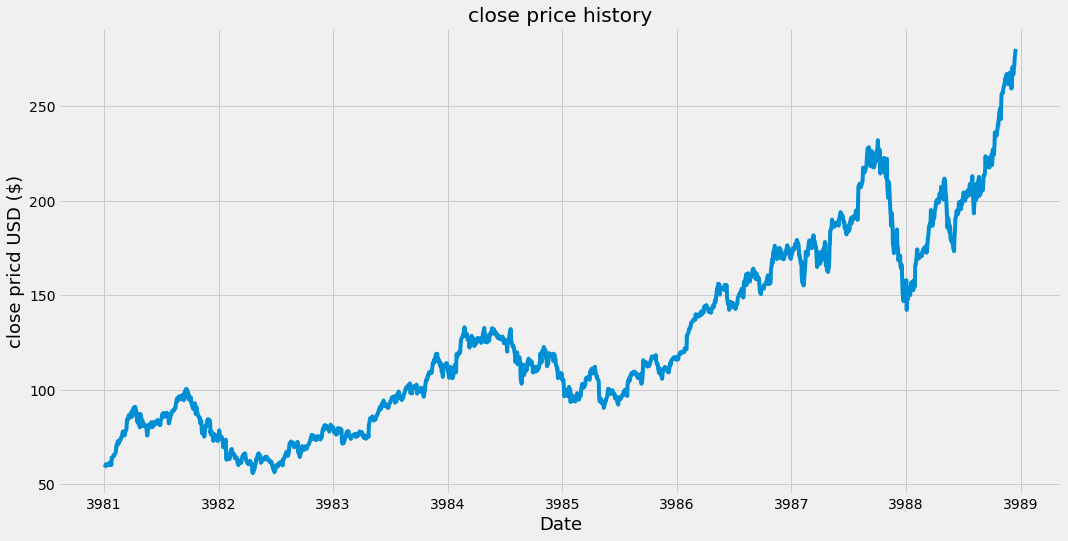

In [94]:
##visualized the closing price
plt.figure(figsize=(16,8))
plt.title("close price history")
plt.plot(df['Close']) ### NAME OF COLUMBN SHOULD BE EXACT
plt.xlabel("Date", fontsize=18)
plt.ylabel("close pricd USD ($)", fontsize=18)
plt.show();


In [99]:
##Creat a new dataframe with close colum
data=df.filter(["Close"])
##convert datafram to numpy array
dataset=data.values
## get the number of row to train the model
training_data_len=math.ceil(len(dataset)* .8)
print(dataset.shape)

(2003, 1)


In [6]:
# scale the data
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)

scaled_data

array([[0.01316509],
       [0.01457064],
       [0.01748985],
       ...,
       [0.97658263],
       [0.99755134],
       [1.        ]])

In [79]:
#creat the training data set
# create scaled trainig data set
train_data=scaled_data[0:training_data_len, :]
#split data into xtrain and ytrain, so 60 data point are for xtrain and only 61st is for ytrain, and there is loop over it
x_train=[]
y_train=[]

for i in range(100, len(train_data)):
    x_train.append(train_data[i-100:i,0])
    y_train.append(train_data[i,0])
    
    if i<=101:
        print(x_train)
        print(y_train)
        print()

[array([0.01316509, 0.01457064, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862193, 0.02173194,
       0.02453668, 0.02367172, 0.01893356, 0.02345548, 0.01900352,
       0.03569838, 0.03440731, 0.0360927 , 0.03973694, 0.04194384,
       0.0417594 , 0.0410789 , 0.04397903, 0.04670744, 0.04979839,
       0.05479095, 0.0652785 , 0.06543749, 0.07127594, 0.07563885,
       0.06814046, 0.07102789, 0.07097066, 0.07906688, 0.07791571,
       0.08004628, 0.08387497, 0.08600558, 0.09214292, 0.09661397,
       0.09790501, 0.09835659, 0.09071194, 0.08886753, 0.08914103,
       0.09632775, 0.09835024, 0.10269405, 0.11293358, 0.12659476,
       0.12403805, 0.1240444 , 0.13392141, 0.13701233, 0.13481179,
       0.13280207, 0.13070964, 0.13766105, 0.14243103, 0.14442805,
       0.13949272, 0.13293563, 0.14507041, 0.15186917, 0.14868284,
       0.15464211, 0.1562639 , 0.15130952, 0.14988489, 0.14770341,
       0.13654806, 0.12058461, 0.13939096, 0.13852602, 0.1252

In [80]:
#convert x_train and y_train to array
x_train, y_train=np.array(x_train), np.array(y_train)



In [89]:
## reshape data (why: LSTM expect 3-D data, number of sample, number of timesetep, number of feature )
y_train.shape

(1503,)

In [90]:
x_train=np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train

array([[[0.01316509],
        [0.01457064],
        [0.01748985],
        ...,
        [0.10585498],
        [0.11449811],
        [0.11116553]],

       [[0.01457064],
        [0.01748985],
        [0.02026915],
        ...,
        [0.11449811],
        [0.11116553],
        [0.10923845]],

       [[0.01748985],
        [0.02026915],
        [0.01984303],
        ...,
        [0.11116553],
        [0.10923845],
        [0.11558567]],

       ...,

       [[0.53704032],
        [0.5286706 ],
        [0.52782479],
        ...,
        [0.5857448 ],
        [0.59767603],
        [0.5912207 ]],

       [[0.5286706 ],
        [0.52782479],
        [0.53076303],
        ...,
        [0.59767603],
        [0.5912207 ],
        [0.58926183]],

       [[0.52782479],
        [0.53076303],
        [0.53076303],
        ...,
        [0.5912207 ],
        [0.58926183],
        [0.58164901]]])

In [48]:
### build LSTM model
model=Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [49]:
##compile the model
model.compile(optimizer="adam", loss="mean_squared_error")


In [50]:
#train model
model.fit(x_train, y_train, batch_size=1, epochs=1)

Epoch 1/1
1503/1503 [==============================] - 68s 45ms/step - loss: 7.6659e-04


In [53]:
#creat testing dataset

test_data=scaled_data[training_data_len-100:, :]
#creat the data setx x_text and y_test
x_test=[]
y_test=dataset[training_data_len:, :]
for i in range(100, len(test_data)):
    x_test.append(test_data[i-100:i, 0])

In [54]:
x_test=np.array(x_test)
x_test.shape

(400, 100)

In [55]:
x_test=np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))
x_test.shape

(400, 100, 1)

In [56]:
###predict model. for price values
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

In [57]:
rms=np.std(predictions-y_test)
rms

5.363658613850172

In [58]:
#plot prediction
train=data[:training_data_len]
valid=data[training_data_len:]
valid["Predictions"]=predictions

valid

/Users/moshagh/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Close,Predictions
Date,,
2018-05-17,186.990005,193.755005
2018-05-18,186.309998,193.839951
2018-05-21,187.630005,193.668167
2018-05-22,187.160004,193.562515
2018-05-23,188.360001,193.445297
...,...,...
2019-12-11,270.769989,273.154938
2019-12-12,271.459991,274.157867
2019-12-13,275.149994,275.214966


/Users/moshagh/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:245: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)


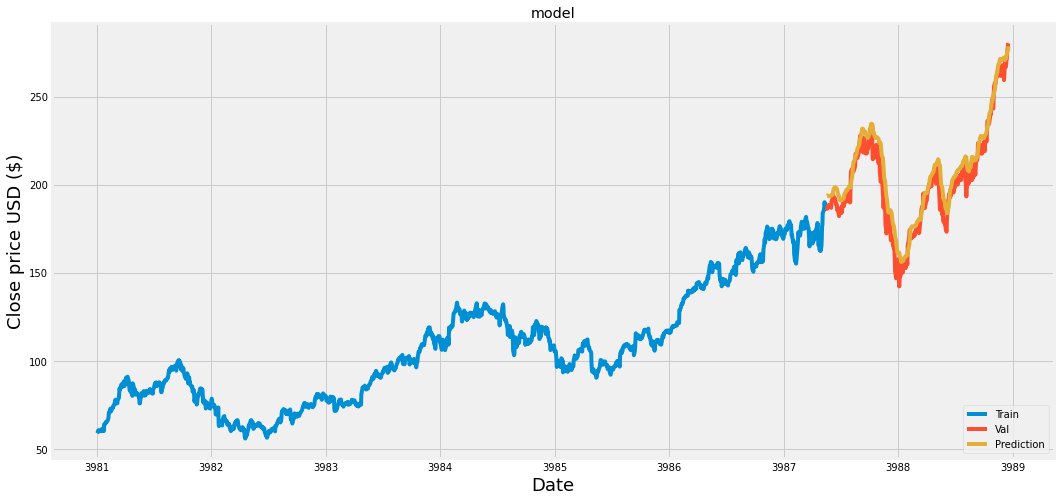

In [59]:
#visualaize
plt.figure(figsize=(16, 8))
plt.title("model")
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close price USD ($)", fontsize=18)
plt.plot(train["Close"])
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Train", "Val", "Prediction"], loc="lower right")
plt.show()